# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
X_train[0].shape

(32, 32, 3)

In [3]:
#reserve a copy of the original data
orig_X_train = X_train.copy()
orig_X_valid = X_valid.copy()

In [4]:
orig_X_train[0].max()

113

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline
train_labels = pd.Series(y_train)
label_cnt = train_labels.value_counts()

In [7]:
import cv2
def grayscale(img):
    '''Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')
    value 0~255
    '''

    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

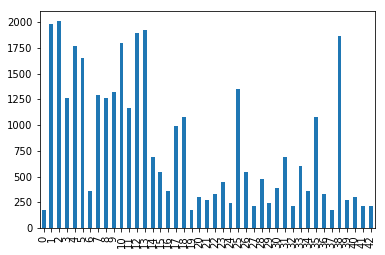

In [8]:
label_cnt.loc[[i for i in range(n_classes)]].plot(kind='bar')

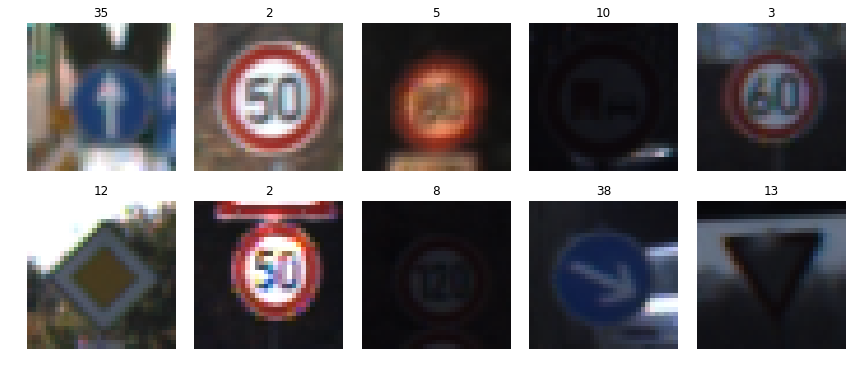

In [9]:
import random

fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

In [10]:
records_per_label = [[] for i in range(n_classes)]
for x,y in zip(X_train,y_train):
    records_per_label[y].append(x)

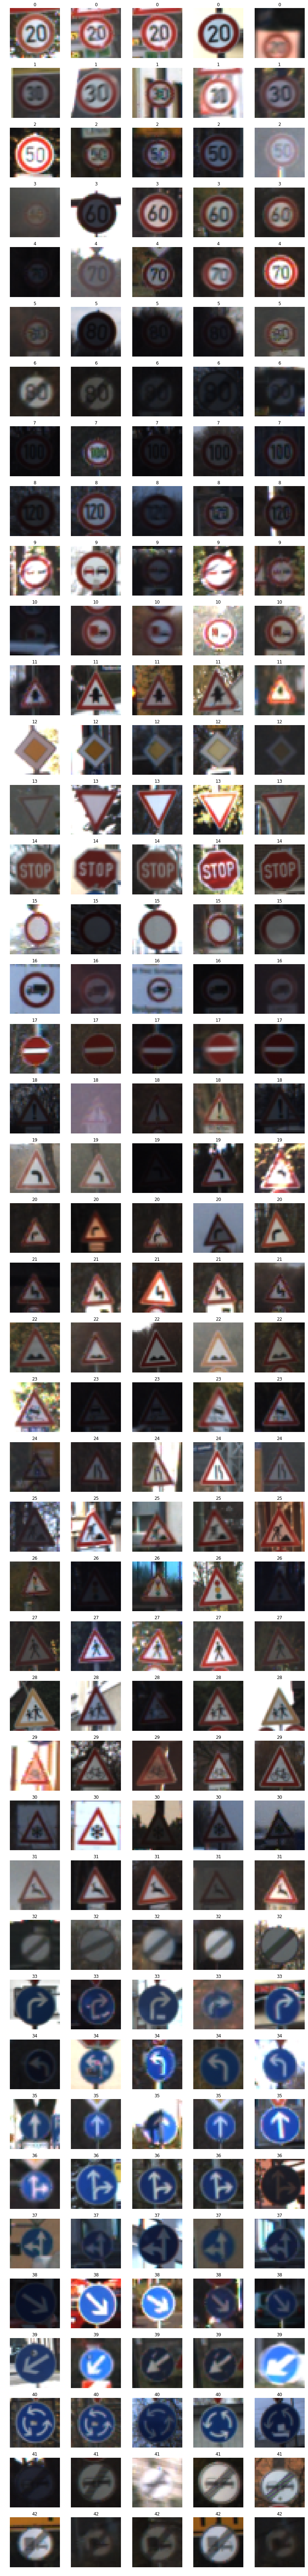

In [11]:
fig, axs = plt.subplots(n_classes,5, figsize=(15, 129))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for k in range(n_classes):
    for i in range(5):
        index = random.randint(0, len(records_per_label[k])-1)
        image = records_per_label[k][index]
        axs[k*5+i].axis('off')
        axs[k*5+i].imshow(image)
        axs[k*5+i].set_title(k)

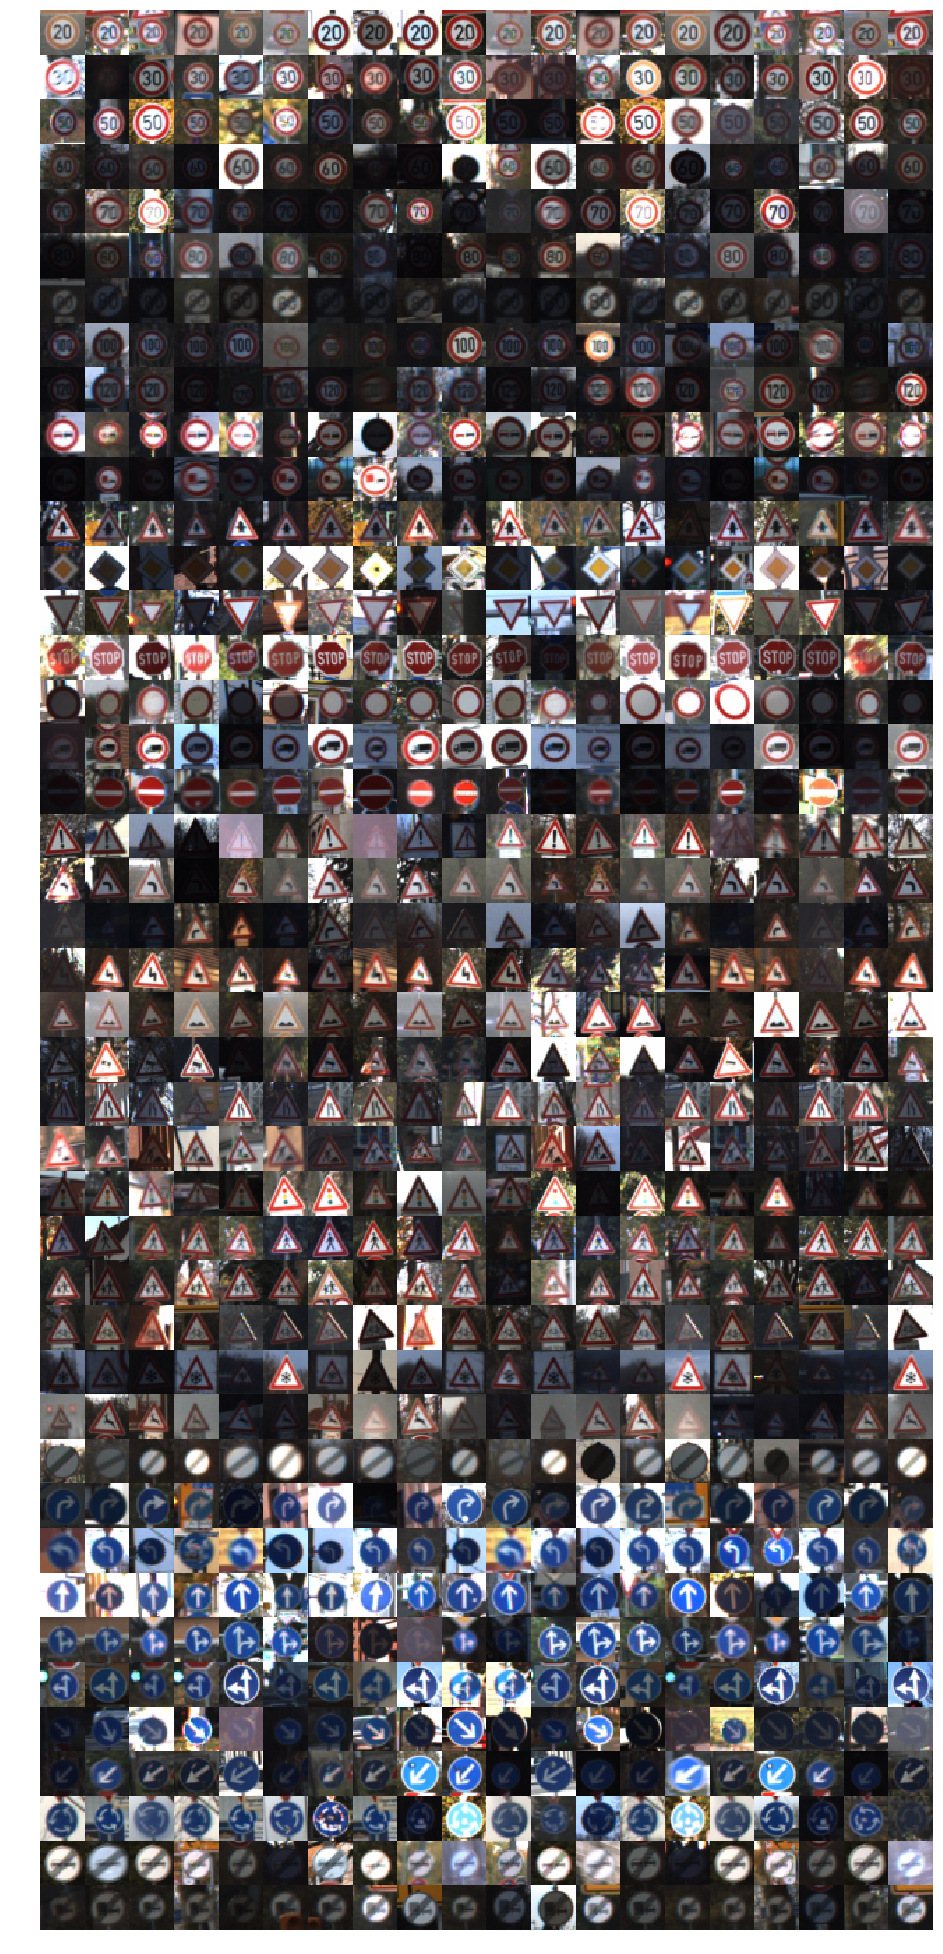

In [12]:
n_images_per_label = 20
im = np.zeros((image_shape[0]*n_classes,image_shape[1]*n_images_per_label,image_shape[2]))
for i in range(n_classes):
    for j in range(n_images_per_label):
        idx = random.randint(0, len(records_per_label[i])-1)
        im[image_shape[0]*i:image_shape[0]*(i+1),image_shape[1]*j:image_shape[1]*(j+1)] = records_per_label[i][idx]/256

plt.figure(figsize=(16, 80))
plt.axis('off')
plt.imshow(im)

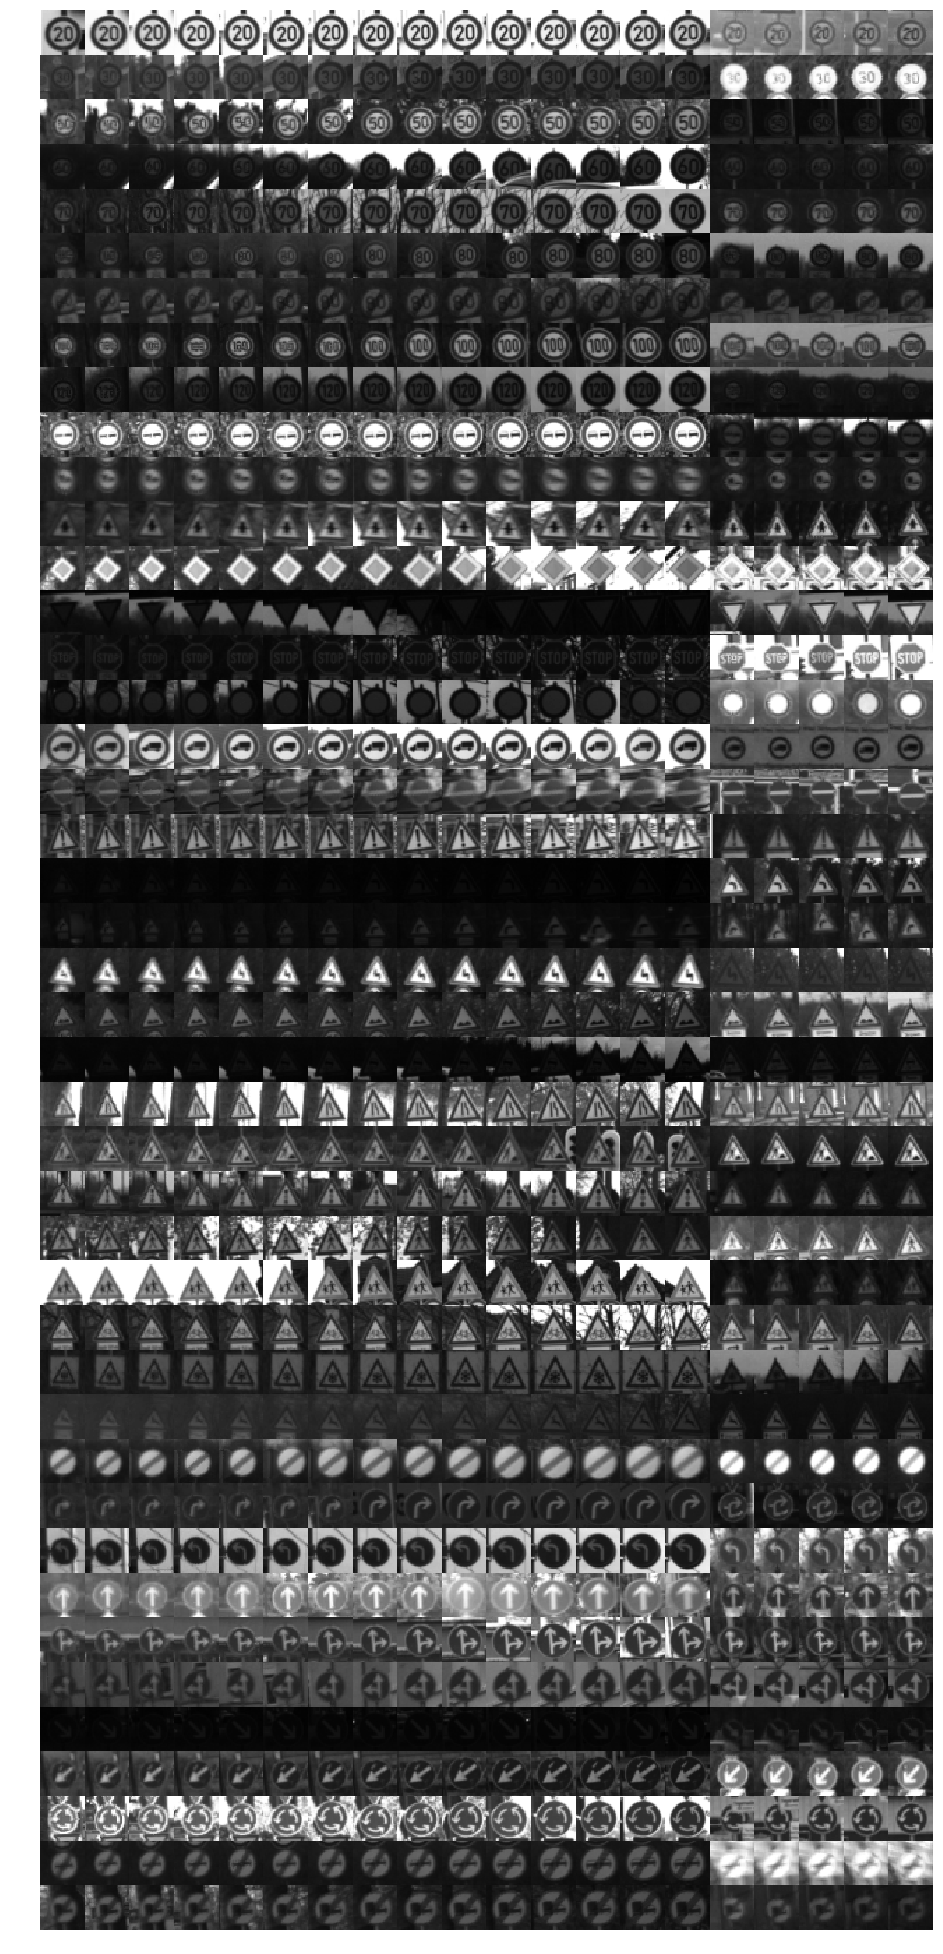

In [13]:
gray_im = np.zeros((image_shape[0]*n_classes,image_shape[1]*n_images_per_label))
for i in range(n_classes):
    for j in range(n_images_per_label):
        gray_im[image_shape[0]*i:image_shape[0]*(i+1),image_shape[1]*j:image_shape[1]*(j+1)] = grayscale(records_per_label[i][2*j])/256
plt.figure(figsize=(16, 80))  
plt.axis('off')
plt.imshow(gray_im,cmap='gray')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.


#### Normalization
1. `preprocessing_gray` turns the image into grayscale, equalize intensity histogram, and then shift and rescale to values between -1 and 1. There are many images in the dataset that are either too bright or too dark. equalization of histogram is meant to balance that.
2. `preprocessing_color` shift and rescale each channel to values between -1 and 1.

In [14]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def equalizeHist(X_data):
    res = []
    if X_data[0].ndim==3:
        yuv = [cv2.cvtColor(X, cv2.COLOR_BGR2YUV) for X in X_data]

        for i in range(len(yuv)):
            yuv[i][:,:,0] = cv2.equalizeHist(yuv[i][:,:,0])

        # convert the YUV image back to RGB format
        res = [cv2.cvtColor(img, cv2.COLOR_YUV2BGR) for img in yuv]
    else:
        res = [cv2.equalizeHist(X) for X in X_data]
        
    return res

def normalize(X_data):
    return (np.array(X_data)-128.0)/128

def preprocessing_gray(X_data):
    gray_X_data = normalize(equalizeHist([grayscale(X) for X in X_data]))
    return np.expand_dims(gray_X_data,-1)

def preprocessing_color(X_data):
    return normalize(equalizeHist(X_data))


#### Create more training data by Rotation and Perspective Transformation 

In [15]:
def randomPerspective(img,rows,cols):
    margin = np.random.randint(low=12, high=16)
    new_center = (np.random.randint(low=margin,high=rows-margin),
                  np.random.randint(low=margin,high=cols-margin))
    
    pts1 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    pts2 = np.float32([[new_center[0]-margin/2+np.random.randint(low=-margin/2,high=0),
                        new_center[1]-margin/2+np.random.randint(low=-margin/2,high=0)],
                       [new_center[0]+margin/2+np.random.randint(low=0,high=margin/2),
                        new_center[1]-margin/2+np.random.randint(low=-margin/2,high=0)],
                       [new_center[0]-margin/2+np.random.randint(low=-margin/2,high=0),
                        new_center[1]+margin/2+np.random.randint(low=0,high=margin/2)],
                       [new_center[0]+margin/2+np.random.randint(low=0,high=margin/2),
                        new_center[1]+margin/2+np.random.randint(low=0,high=margin/2)]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(rows,cols))
    return dst

In [16]:
def randomRotate(img,rows,cols):
    deg = np.random.randint(low=-15,high=15)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),deg,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst

In [17]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
X_train = equalizeHist(X_train)

records_per_label = [[] for i in range(n_classes)]
for x,y in zip(X_train,y_train):
    records_per_label[y].append(x)
train_labels = pd.Series(y_train)
label_cnt = train_labels.value_counts()

In [18]:
rows, cols, chs = X_train[0].shape
target_records_per_label = 8000
rotate_n = 5
perspective_n = 6
min_cnt_per_class = label_cnt.min()
for i in range(n_classes):
    random.shuffle(records_per_label[i])
    n = len(records_per_label[i])
    for j in range(n):
        if len(records_per_label[i])<target_records_per_label:
            img = records_per_label[i][j]
            for t in range(perspective_n):
                records_per_label[i].append(randomPerspective(img,rows,cols))
            for s in range(rotate_n):
                rotated = randomRotate(img,rows,cols)
                records_per_label[i].append(rotated)
                for t in range(perspective_n):
                    records_per_label[i].append(randomPerspective(rotated,rows,cols))

In [19]:
for i in range(n_classes):
    random.shuffle(records_per_label[i])

#### Balancing

In [20]:
new_label_cnt = pd.Series([len(records_per_label[i]) for i in range(n_classes)])

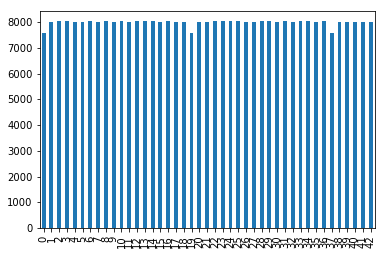

In [21]:
new_label_cnt.loc[[i for i in range(n_classes)]].plot(kind='bar')

In [22]:
print(max(new_label_cnt))
cnt_per_class = min(new_label_cnt)

8040


In [23]:
### Balance original images
balanced_X = []
balanced_y = []
for i in range(n_classes):
    balanced_X += records_per_label[i][:cnt_per_class]
    balanced_y += ([i]* cnt_per_class)

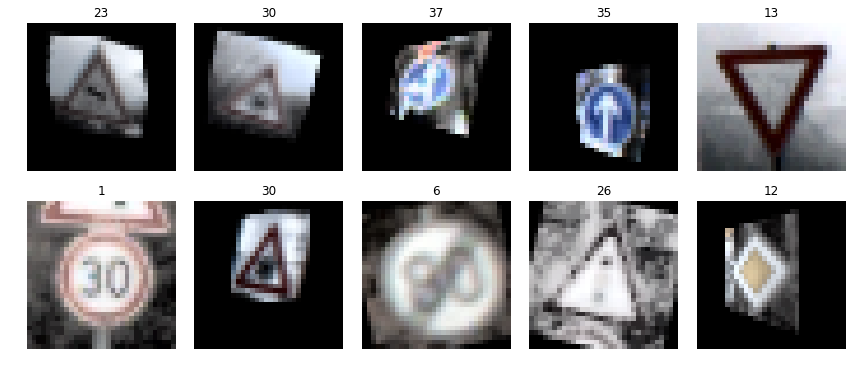

In [24]:
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(balanced_X))
    image = balanced_X[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(balanced_y[index])

In [25]:
balanced_np_y = np.array(balanced_y)

In [26]:
balanced_gray_X_train = np.expand_dims(normalize([grayscale(X) for X in balanced_X]),-1)
balanced_X_train = normalize(balanced_X)
print(balanced_gray_X_train.max(),balanced_gray_X_train.min())

gray_X_valid = preprocessing_gray(orig_X_valid)
X_valid = preprocessing_color(orig_X_valid)
print(gray_X_valid.max(),gray_X_valid.min())

gray_X_test = preprocessing_gray(X_test)
X_test = preprocessing_color(X_test)

0.9921875 -1.0
0.9921875 -1.0


In [27]:
import h5py
h5f = h5py.File('balanced_training.h5', 'w')
h5f.create_dataset('X', data=balanced_X_train)
h5f.create_dataset('Y', data=balanced_np_y)

h5f.close()

In [28]:
h5f = h5py.File('gray_balanced_training.h5', 'w')
h5f.create_dataset('X', data=balanced_gray_X_train)
h5f.create_dataset('Y', data=balanced_np_y)

h5f.close()

### Model Architecture

In [29]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import h5py

class NetworkConfig:
    def __init__(self):
        self.net = {}
class ExperimentEnv:
    def __init__(self):
        self.train_acc = {}
        self.valid_acc = {}
        self.test_acc = {}
        
net_cfg = NetworkConfig()
env = ExperimentEnv()

In [70]:
def LeNet(x, weights, biases, is_training, net_config=None, net_name='LeNet'):  
    # Layer 1: Convolutional.
    conv1   = tf.nn.conv2d(x, weights['conv1_W'], strides=[1, 1, 1, 1], padding='VALID') + biases['conv1_b']
    #Activation.
    conv1 = tf.nn.relu(conv1)
    #Pooling. 
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. 
    conv2   = tf.nn.conv2d(conv1, weights['conv2_W'], strides=[1, 1, 1, 1], padding='VALID') + biases['conv2_b']
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. 
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten.
    fc0   = flatten(conv2)
    # dropout
    fc0 = tf.layers.dropout(fc0, rate=0.5, training=is_training)
    
    # Layer 3: Fully Connected.
    fc1   = tf.matmul(fc0, weights['fc1_W']) + biases['fc1_b']
    # Activation.
    fc1    = tf.nn.relu(fc1)
    # dropout
    fc1 = tf.layers.dropout(fc1, rate=0.5, training=is_training)

    # Layer 4: Fully Connected. 
    fc2    = tf.matmul(fc1, weights['fc2_W']) + biases['fc2_b']
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. 
    logits = tf.matmul(fc2, weights['fc3_W']) + biases['fc3_b']
    
    if net_config:
        net_config.net[net_name] = {}
        net_config.net[net_name]['conv1'] = conv1
        net_config.net[net_name]['conv2'] = conv2
        net_config.net[net_name]['fc0'] = fc0
        net_config.net[net_name]['fc1'] = fc1
        net_config.net[net_name]['fc2'] = fc2

    return logits


In [69]:
def VGG(x, weights, biases, is_training, net_config=None, net_name='VGG'):  
    # Layer 1: Convolutional.
    conv1   = tf.nn.conv2d(x, weights['conv1'], strides=[1, 1, 1, 1], padding='VALID') + biases['conv1']
    conv1 = tf.nn.relu(conv1)

    # Layer 2: Convolutional.     
    conv2   = tf.nn.conv2d(conv1, weights['conv2'], strides=[1, 1, 1, 1], padding='VALID') + biases['conv2']
    conv2 = tf.nn.relu(conv2)
    #Pooling. 
    pool1 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv3   = tf.nn.conv2d(pool1, weights['conv3'], strides=[1, 1, 1, 1], padding='VALID') + biases['conv3']
    conv3 = tf.nn.relu(conv3)
    # Layer 2: Convolutional.     
    conv4   = tf.nn.conv2d(conv3, weights['conv4'], strides=[1, 1, 1, 1], padding='VALID') + biases['conv4']
    conv4 = tf.nn.relu(conv4)
    #Pooling. 
    pool2 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten.
    fc0   = flatten(pool2)
    
    # Layer 3: Fully Connected.
    fc1   = tf.matmul(fc0, weights['fc1']) + biases['fc1']
    # Activation.
    fc1    = tf.nn.relu(fc1)
    # dropout
    fc1 = tf.layers.dropout(fc1, rate=0.5, training=is_training)

    # Layer 4: Fully Connected. 
    fc2    = tf.matmul(fc1, weights['fc2']) + biases['fc2']
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # dropout
    fc2 = tf.layers.dropout(fc2, rate=0.5, training=is_training)

    # Layer 5: Fully Connected. 
    logits = tf.matmul(fc2, weights['fc3']) + biases['fc3']
    
    if net_config:
        net_config.net[net_name] = {}
        net_config.net[net_name]['conv1'] = conv1
        net_config.net[net_name]['conv2'] = conv2
        net_config.net[net_name]['conv3'] = conv3
        net_config.net[net_name]['conv4'] = conv4
        net_config.net[net_name]['fc0'] = fc0
        net_config.net[net_name]['fc1'] = fc1
        net_config.net[net_name]['fc2'] = fc2
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Load data

In [32]:
def load_data(balanced, channels):
    if balanced:
        h5f = h5py.File('gray_balanced_training.h5' if channels==1 else 'balanced_training.h5','r')
        X_train = h5f['X'][:]
        y_train = h5f['Y'][:].astype(np.int32)
        h5f.close()
    else:
        X_train = preprocessing_gray(orig_X_train)
        y_train = train['labels']
        
    return X_train,y_train


#### LeNet
Uncomment the code to define this model

In [71]:
mu = 0
sigma = 0.1
balanced = True
channels = 1
tf.reset_default_graph()
weights = {
    'conv1_W': tf.Variable(tf.truncated_normal(shape=(5, 5, channels, 6), mean = mu, stddev = sigma)),
    'conv2_W': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
    'fc1_W': tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma)),
    'fc2_W': tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),
    'fc3_W': tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))  
}
biases = {
    'conv1_b' : tf.Variable(tf.zeros(6)),
    'conv2_b' : tf.Variable(tf.zeros(16)),
    'fc1_b' : tf.Variable(tf.zeros(120)),
    'fc2_b'  : tf.Variable(tf.zeros(84)),
    'fc3_b'  : tf.Variable(tf.zeros(n_classes))
}

x = tf.placeholder(tf.float32, (None, 32, 32, channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

X_train,y_train = load_data(balanced, channels)

rate = 0.001
EPOCHS = 40
BATCH_SIZE = 128
logits = LeNet(x,weights,biases,False, net_cfg, 'LeNet1')
logits_pred = LeNet(x,weights,biases,False)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

predict = tf.argmax(logits_pred, 1)
correct_prediction = tf.equal(predict, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Uncomment the codes below to train the gray LeNet model

In [34]:
### Train Lenet model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    best_acc = 0
    env.train_acc['LeNet1'] = []
    env.valid_acc['LeNet1'] = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(gray_X_valid if channels==1 else X_valid, y_valid)
        fit_accuracy = evaluate(X_train, y_train)
        env.train_acc['LeNet1'].append(fit_accuracy)
        env.valid_acc['LeNet1'].append(validation_accuracy)

        print("EPOCH {}: Accuracy (Train, Valid) = ({:.3f},{:.3f})".format(i+1,fit_accuracy,validation_accuracy))
 
        if validation_accuracy>best_acc:
            best_acc = validation_accuracy
            saver.save(sess, './lenet1_model/lenet_'+('balanced_best' if balanced else '_best'))
            print("A better Model saved")

Training...

EPOCH 1: Accuracy (Train, Valid) = (0.689,0.850)
A better Model saved
EPOCH 2: Accuracy (Train, Valid) = (0.782,0.889)
A better Model saved
EPOCH 3: Accuracy (Train, Valid) = (0.824,0.899)
A better Model saved
EPOCH 4: Accuracy (Train, Valid) = (0.847,0.869)
EPOCH 5: Accuracy (Train, Valid) = (0.870,0.909)
A better Model saved
EPOCH 6: Accuracy (Train, Valid) = (0.883,0.916)
A better Model saved
EPOCH 7: Accuracy (Train, Valid) = (0.887,0.924)
A better Model saved
EPOCH 8: Accuracy (Train, Valid) = (0.897,0.914)
EPOCH 9: Accuracy (Train, Valid) = (0.895,0.926)
A better Model saved
EPOCH 10: Accuracy (Train, Valid) = (0.899,0.916)
EPOCH 11: Accuracy (Train, Valid) = (0.906,0.905)
EPOCH 12: Accuracy (Train, Valid) = (0.914,0.923)
EPOCH 13: Accuracy (Train, Valid) = (0.915,0.923)
EPOCH 14: Accuracy (Train, Valid) = (0.919,0.920)
EPOCH 15: Accuracy (Train, Valid) = (0.923,0.918)
EPOCH 16: Accuracy (Train, Valid) = (0.927,0.918)
EPOCH 17: Accuracy (Train, Valid) = (0.926,0.919)

Uncomment the codes below to continue training of the gray LeNet model

In [35]:
# Continue training
CONT_EPOCHS = 80
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet1_model/lenet_balanced_best.meta')
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    num_examples = len(X_train)
    
    for i in range(CONT_EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(gray_X_valid if channels==1 else X_valid, y_valid)
        fit_accuracy = evaluate(X_train, y_train)
        env.train_acc['LeNet1'].append(fit_accuracy)
        env.valid_acc['LeNet1'].append(validation_accuracy)
        if i%10==0:
            print("EPOCH {}: Accuracy (Train, Valid) = ({:.3f},{:.3f})".format(i+1,fit_accuracy,validation_accuracy))
 
        if validation_accuracy>best_acc:
            best_acc = validation_accuracy
            saver.save(sess, './lenet1_model/lenet'+('_balanced_best' if balanced else '_best'))
            print("A better Model with accuracy", validation_accuracy, "has been saved")
            
#     saver.save(sess, './lenet1_model/lenet'+('_balanced' if balanced else '')+'_'+str(validation_accuracy*100))
#     print("Last Model saved")

INFO:tensorflow:Restoring parameters from ./lenet_balanced
EPOCH 1: Accuracy (Train, Valid) = (0.902,0.926)
EPOCH 11: Accuracy (Train, Valid) = (0.938,0.919)
EPOCH 21: Accuracy (Train, Valid) = (0.950,0.925)
EPOCH 31: Accuracy (Train, Valid) = (0.953,0.920)
EPOCH 41: Accuracy (Train, Valid) = (0.954,0.912)
EPOCH 51: Accuracy (Train, Valid) = (0.963,0.925)
EPOCH 61: Accuracy (Train, Valid) = (0.960,0.919)
EPOCH 71: Accuracy (Train, Valid) = (0.960,0.920)


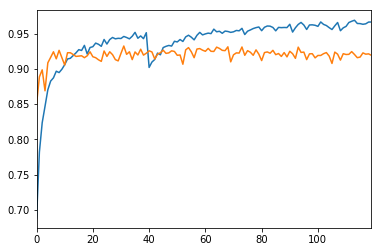

In [39]:
ax = pd.Series(data=env.train_acc['LeNet1']).plot()
pd.Series(data=env.valid_acc['LeNet1']).plot(ax=ax)

#### Summarizing LeNet

#### 1. Without Balancing

If no balancing technique was applied to the training data.

With equalizeHist, the grayscale model gives a model with about 95% validation accuracy.

After 25 epoch, training accuracy achieves 100% and validation accuracy wouldn't improve any more. This model didn't do well on the images downloaded from internet in the later part of this project. This hints overfitting: we don't have enough training data to further improve weights in the network. So the next thing to try is artificially generating more training data. 

#### 2. With Balancing

Balancing method 1:

I random sampled 1000 or all (whichever is smaller) samples from each class, and generated 6 images using rotation and perspective transformation from each image in these samples. Thus I got about 7000 images for each class. With this balancing technique, I trained the gray model for 27 epochs, training accuracy achieves 92.6% and validation accuracy achieves 90.9%. Then no further improve can be achieved with more training iteration. The model trained with the resulting data doesn't satisfy the submission requirement. This is not surprising because by sampling 1000 images for each class from the original training data set, I might have lost many training samples. 

Balancing method 2:

I kept all the original images, and generated new images using rotation and perspective transformation from the original ones, so that each sign has about 8000 images. After 15 epochs, training accuracy achieves 93.1%, and validation accuracy achieves 92.8%. Further training will increase training accuracy but won't help the validation accuracy. Without dropout this model only predicted 2 of 7 images correctly.

#### 3. With Balancing and dropout

As a lesson from above, I used balancing method 2.

After 31 epochs, the best model trained has training accuracy 0.94.6% and validation accuracy achieves 93.2%. More training improved training accuracy but validation accuracy stalled.


#### Lenet with More Filters

In [72]:
mu = 0
sigma = 0.1
balanced = True
channels = 1
tf.reset_default_graph()
weights = {
    'conv1_W': tf.Variable(tf.truncated_normal(shape=(5, 5, channels, 16), mean = mu, stddev = sigma)),
    'conv2_W': tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 16), mean = mu, stddev = sigma)),
    'fc1_W': tf.Variable(tf.truncated_normal(shape=(400, 128), mean = mu, stddev = sigma)),
    'fc2_W': tf.Variable(tf.truncated_normal(shape=(128, 64), mean = mu, stddev = sigma)),
    'fc3_W': tf.Variable(tf.truncated_normal(shape=(64, n_classes), mean = mu, stddev = sigma))  
}
biases = {
    'conv1_b' : tf.Variable(tf.zeros(16)),
    'conv2_b' : tf.Variable(tf.zeros(16)),
    'fc1_b' : tf.Variable(tf.zeros(128)),
    'fc2_b'  : tf.Variable(tf.zeros(64)),
    'fc3_b'  : tf.Variable(tf.zeros(n_classes))
}

x = tf.placeholder(tf.float32, (None, 32, 32, channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

X_train,y_train = load_data(balanced, channels)

rate = 0.001
EPOCHS = 40
BATCH_SIZE = 128

logits = LeNet(x,weights,biases,True, net_cfg,'LeNet2')
logits_pred = LeNet(x,weights,biases,False)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

predict = tf.argmax(logits_pred, 1)
correct_prediction = tf.equal(predict, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [37]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    best_acc = 0
    env.train_acc['LeNet2'] = []
    env.valid_acc['LeNet2'] = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(gray_X_valid if channels==1 else X_valid, y_valid)
        fit_accuracy = evaluate(X_train, y_train)
        env.train_acc['LeNet2'].append(fit_accuracy)
        env.valid_acc['LeNet2'].append(validation_accuracy)
        print("EPOCH {}: Accuracy (Train, Valid) = ({:.3f},{:.3f})".format(i+1,fit_accuracy,validation_accuracy))
 
        if validation_accuracy>best_acc:
            best_acc = validation_accuracy
            saver.save(sess, './lenet2_model/lenet_more_filter'+('_best' if balanced else ''))
            print("A better Model saved")

Training...

EPOCH 1: Accuracy (Train, Valid) = (0.582,0.717)
A better Model saved
EPOCH 2: Accuracy (Train, Valid) = (0.684,0.800)
A better Model saved
EPOCH 3: Accuracy (Train, Valid) = (0.717,0.816)
A better Model saved
EPOCH 4: Accuracy (Train, Valid) = (0.758,0.848)
A better Model saved
EPOCH 5: Accuracy (Train, Valid) = (0.773,0.861)
A better Model saved
EPOCH 6: Accuracy (Train, Valid) = (0.775,0.871)
A better Model saved
EPOCH 7: Accuracy (Train, Valid) = (0.793,0.888)
A better Model saved
EPOCH 8: Accuracy (Train, Valid) = (0.795,0.895)
A better Model saved
EPOCH 9: Accuracy (Train, Valid) = (0.810,0.912)
A better Model saved
EPOCH 10: Accuracy (Train, Valid) = (0.815,0.895)
EPOCH 11: Accuracy (Train, Valid) = (0.818,0.909)
EPOCH 12: Accuracy (Train, Valid) = (0.820,0.905)
EPOCH 13: Accuracy (Train, Valid) = (0.827,0.897)
EPOCH 14: Accuracy (Train, Valid) = (0.829,0.901)
EPOCH 15: Accuracy (Train, Valid) = (0.832,0.901)
EPOCH 16: Accuracy (Train, Valid) = (0.837,0.916)
A bette

In [87]:
# Continue training
CONT_EPOCHS = 1
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet2_model/lenet_more_filter_best.meta')
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./lenet2_model'))
    num_examples = len(X_train)
    
    for i in range(CONT_EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(gray_X_valid if channels==1 else X_valid, y_valid)
        fit_accuracy = evaluate(X_train, y_train)
        env.train_acc['LeNet2'].append(fit_accuracy)
        env.valid_acc['LeNet2'].append(validation_accuracy)
        if i%10==0:
            print("EPOCH {}: Accuracy (Train, Valid) = ({:.3f},{:.3f})".format(i+1,fit_accuracy,
                                                                               validation_accuracy))
 
        if validation_accuracy>best_acc:
            best_acc = validation_accuracy
            saver.save(sess, './lenet2_model/lenet_more_filter_best')
            print("A better Model with accuracy", validation_accuracy, "has been saved")
            
    saver.save(sess, './lenet2_model/lenet'+('_balanced' if balanced else '')+'_'+str(validation_accuracy*100))
    print("Last Model saved")

INFO:tensorflow:Restoring parameters from ./lenet2_model/lenet_balanced_93.2653060197
EPOCH 1: Accuracy (Train, Valid) = (0.865,0.923)
Last Model saved


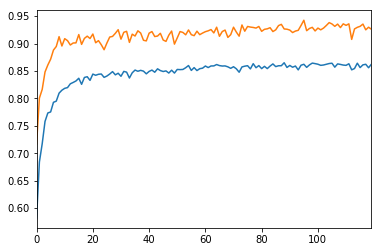

In [40]:
ax = pd.Series(data=env.train_acc['LeNet2']).plot()
pd.Series(data=env.valid_acc['LeNet2']).plot(ax=ax)

#### Summarizing LeNet with More Filters

As learnt from LeNet1, I decided to go with balancing and dropout directly. In 120 Epochs, the best model I got has train accuracy of 86% and valid accuracy of 94.2%. Train accuracy wouldn't improve with further training. 

#### VGG

In [132]:
#VGG model
mu = 0
sigma = 0.1
balanced = True
tf.reset_default_graph()
channels = 3 #1 for gray, 3 for color

vgg_weights = {
    'conv1': tf.Variable(tf.truncated_normal(shape=(3, 3, channels, 8), mean = mu, stddev = sigma)),
    'conv2': tf.Variable(tf.truncated_normal(shape=(3, 3, 8, 8), mean = mu, stddev = sigma)),
    'conv3': tf.Variable(tf.truncated_normal(shape=(3, 3, 8, 16), mean = mu, stddev = sigma)),
    'conv4': tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 16), mean = mu, stddev = sigma)),
    'fc1': tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma)),
    'fc2': tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),
    'fc3': tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))  
}
vgg_biases = {
    'conv1' : tf.Variable(tf.zeros(8)),
    'conv2' : tf.Variable(tf.zeros(8)),
    'conv3' : tf.Variable(tf.zeros(16)),
    'conv4' : tf.Variable(tf.zeros(16)),
    'fc1' : tf.Variable(tf.zeros(120)),
    'fc2'  : tf.Variable(tf.zeros(84)),
    'fc3'  : tf.Variable(tf.zeros(n_classes))
}

vgg_x = tf.placeholder(tf.float32, (None, 32, 32, channels))
vgg_y = tf.placeholder(tf.int32, (None))
vgg_one_hot_y = tf.one_hot(vgg_y, n_classes)

rate = 0.001
EPOCHS = 80
BATCH_SIZE = 256

vgg_logits = VGG(vgg_x,vgg_weights,vgg_biases, True, net_cfg,'VGG')
vgg_logits_pred = VGG(vgg_x,vgg_weights,vgg_biases, False)

vgg_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=vgg_one_hot_y, logits=vgg_logits)
vgg_loss_operation = tf.reduce_mean(vgg_cross_entropy)
vgg_optimizer = tf.train.AdamOptimizer(learning_rate = rate)
vgg_training_operation = vgg_optimizer.minimize(vgg_loss_operation)

vgg_predict = tf.argmax(vgg_logits_pred, 1)
vgg_correct_prediction = tf.equal(vgg_predict, tf.argmax(vgg_one_hot_y, 1))
vgg_accuracy_operation = tf.reduce_mean(tf.cast(vgg_correct_prediction, tf.float32))
vgg_saver = tf.train.Saver()

In [44]:
def vgg_evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(vgg_accuracy_operation, feed_dict={vgg_x: batch_x, vgg_y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

if balanced:
    h5f = h5py.File('gray_balanced_training.h5' if channels==1 else 'balanced_training.h5','r')
    X_train = h5f['X'][:]
    y_train = h5f['Y'][:].astype(np.int32)
    h5f.close()
else:
    X_train = preprocessing_gray(orig_X_train)
    y_train = train['labels']

env.train_acc['VGG'] = []
env.valid_acc['VGG'] = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    best_acc = 0.93
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(vgg_training_operation, feed_dict={vgg_x: batch_x, vgg_y: batch_y})
            
        validation_accuracy = vgg_evaluate(gray_X_valid if channels==1 else X_valid, y_valid)
        fit_accuracy = vgg_evaluate(X_train, y_train)
        env.train_acc['VGG'].append(fit_accuracy)
        env.valid_acc['VGG'].append(validation_accuracy)

        if i%10==0:
            print("EPOCH {}: Accuracy (Train, Valid) = ({:.3f},{:.3f})".format(i+1,fit_accuracy,
                                                                               validation_accuracy))

        if validation_accuracy>best_acc:
            best_acc = validation_accuracy
            vgg_saver.save(sess, './vgg_model/vgg'+('_balanced_best' if balanced else '_best'))
            print("A better Model with", validation_accuracy, "validation accuracy was saved")
            
#     vgg_saver.save(sess, './vgg_model/vgg'+('_balanced' if balanced else '')+'_'+str(validation_accuracy*100))
#     print("Last Model saved to", 
#           'vgg'+('_balanced' if balanced else '')+'_'+str(validation_accuracy*100))

Training...

EPOCH 1: Accuracy (Train, Valid) = (0.504,0.586)
EPOCH 11: Accuracy (Train, Valid) = (0.874,0.922)
A better Model with 0.935827663642 validation accuracy was saved
A better Model with 0.940589569161 validation accuracy was saved
A better Model with 0.94126984127 validation accuracy was saved
EPOCH 21: Accuracy (Train, Valid) = (0.905,0.921)
A better Model with 0.943083899983 validation accuracy was saved
A better Model with 0.943310656839 validation accuracy was saved
EPOCH 31: Accuracy (Train, Valid) = (0.922,0.945)
A better Model with 0.94512471631 validation accuracy was saved
A better Model with 0.947392289736 validation accuracy was saved
EPOCH 41: Accuracy (Train, Valid) = (0.934,0.947)
A better Model with 0.947392290249 validation accuracy was saved
A better Model with 0.950113378171 validation accuracy was saved
EPOCH 51: Accuracy (Train, Valid) = (0.928,0.931)
A better Model with 0.953741496599 validation accuracy was saved
EPOCH 61: Accuracy (Train, Valid) = (0.9

The best validation accuracy 96.8% is achieved at epoch 27. Training accuracy continues to impove after that. After 60 epochs, train accuracy becomes stablized around 95%.

Train the model for more epochs

In [45]:
# Continue training
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('vgg_model/vgg_balanced_best.meta')
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./vgg_model/'))
    num_examples = len(X_train)

    best_acc = 0.96
    for i in range(100):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(vgg_training_operation, feed_dict={vgg_x: batch_x, vgg_y: batch_y})
            
        validation_accuracy = vgg_evaluate(gray_X_valid if channels==1 else X_valid, y_valid)
        fit_accuracy = vgg_evaluate(X_train, y_train)
        env.train_acc['VGG'].append(fit_accuracy)
        env.valid_acc['VGG'].append(validation_accuracy)
        if i%10==0:
            print("EPOCH {}: Accuracy (Train, Valid) = ({:.3f},{:.3f})".format(i+1,fit_accuracy,validation_accuracy))

        if validation_accuracy>best_acc:
            best_acc = validation_accuracy
            saver.save(sess, './vgg_model/vgg'+('_balanced_best' if balanced else '_best'))
            print("A better Model with accuracy", validation_accuracy, "has been saved")

#     saver.save(sess, './vgg_model/vgg'+('_balanced' if balanced else '')+'_'+str(validation_accuracy*100))
#     print("Last Model saved")

INFO:tensorflow:Restoring parameters from ./vgg_model/vgg_balanced_best
EPOCH 1: Accuracy (Train, Valid) = (0.944,0.950)
EPOCH 11: Accuracy (Train, Valid) = (0.944,0.947)
EPOCH 21: Accuracy (Train, Valid) = (0.945,0.948)
EPOCH 31: Accuracy (Train, Valid) = (0.946,0.954)
EPOCH 41: Accuracy (Train, Valid) = (0.941,0.949)
A better Model with accuracy 0.960317459804 has been saved
EPOCH 51: Accuracy (Train, Valid) = (0.949,0.951)
A better Model with accuracy 0.961678004022 has been saved
EPOCH 61: Accuracy (Train, Valid) = (0.952,0.955)
EPOCH 71: Accuracy (Train, Valid) = (0.946,0.955)
EPOCH 81: Accuracy (Train, Valid) = (0.955,0.954)
EPOCH 91: Accuracy (Train, Valid) = (0.951,0.955)


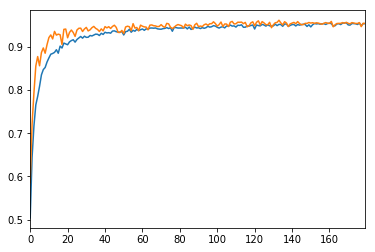

In [46]:
ax = pd.Series(data=env.train_acc['VGG']).plot()
pd.Series(data=env.valid_acc['VGG']).plot(ax=ax)

In [53]:
print(env.valid_acc['VGG'][133],env.train_acc['VGG'][133])

0.961678004022 0.952141011498


In [54]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('vgg_model/vgg_balanced_best.meta')

    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./vgg_model/'))
    
    predict_valid = sess.run(vgg_predict, feed_dict={vgg_x: gray_X_valid if channels==1 else X_valid })
    test_accuracy = vgg_evaluate(gray_X_test if channels==1 else X_test, y_test)
    print(test_accuracy)    

INFO:tensorflow:Restoring parameters from ./vgg_model/vgg_balanced_best
0.926920031406


In [48]:
wrongs = []
for i in range(len(predict_valid)):
    if predict_valid[i]!=y_valid[i]:
#         print(i,'prediction:', predict_valid[i],'truth:', y_valid[i])
        wrongs.append(i)

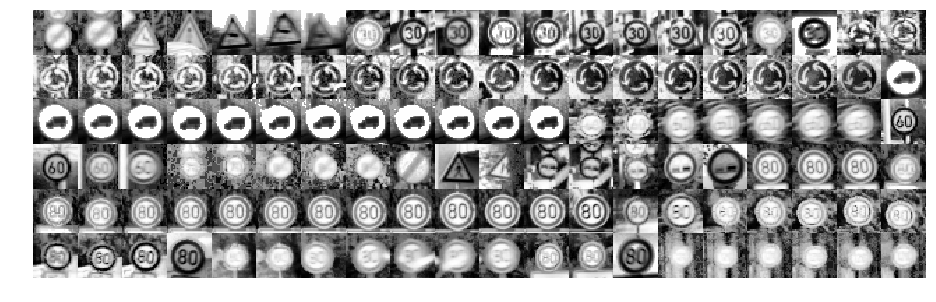

In [49]:
n_images_per_label = 20
im = np.zeros((image_shape[0]*6,image_shape[1]*n_images_per_label,image_shape[2]))
k = 0
for i in range(6):
    for j in range(n_images_per_label):
        idx = random.randint(0, len(records_per_label[i])-1)
        im[image_shape[0]*i:image_shape[0]*(i+1),image_shape[1]*j:image_shape[1]*(j+1)] = (gray_X_valid[wrongs[k]]+1)/2
        k += 1
plt.figure(figsize=(16, 60))
plt.axis('off')
plt.imshow(im)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

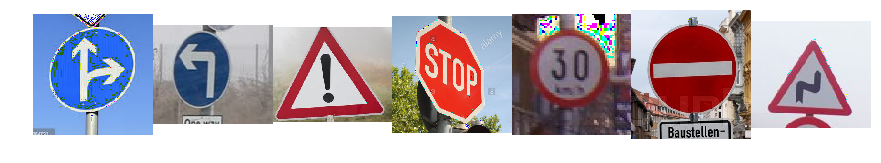

In [55]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import glob

images = []
for file in glob.glob("web_images/*.png"):
    img = mpimg.imread(file)
    images.append((img*256.0).astype(np.uint8))
    
fig, axs = plt.subplots(1,len(images), figsize=(15, 129))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(len(images)):
        axs[i].axis('off')
        axs[i].imshow(images[i])


### Predict the Sign Type for Each Image

In [56]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
rescaled_imgs = [None for i in range(len(images))]
for i in range(len(images)):
#    shape = images[i].shape
#     tmp = cv2.resize(grayscale(images[i]), (int(shape[0]/shape[1]*32),32) if shape[1]>shape[0] else (32,int(shape[1]/shape[0]*32)))
#     rescaled_imgs[i][0:tmp.shape[0],0:tmp.shape[1]] = tmp
    rescaled_imgs[i] = cv2.resize(images[i],(32,32))
    
rescaled_imgs = np.array(rescaled_imgs)
rescaled_imgs.shape

(7, 32, 32, 3)

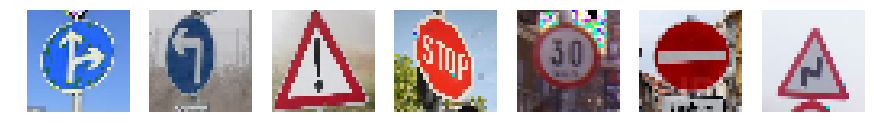

In [57]:
### double check
fig, axs = plt.subplots(1,len(rescaled_imgs), figsize=(15, 15))
axs = axs.ravel()
for i in range(len(rescaled_imgs)):
        axs[i].axis('off')
        axs[i].imshow(rescaled_imgs[i])

In [58]:
### shift mean to 0
gray_X_web = preprocessing_gray(rescaled_imgs)
X_web = preprocessing_color(rescaled_imgs)

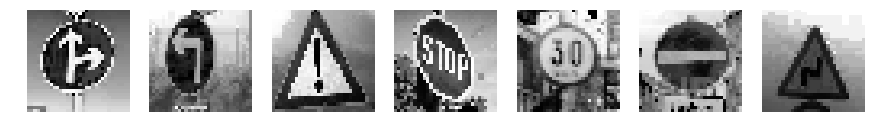

In [59]:
### double check grayscale
fig, axs = plt.subplots(1,len(gray_X_web), figsize=(15, 15))
axs = axs.ravel()
for i in range(len(gray_X_web)):
        axs[i].axis('off')
        axs[i].imshow((np.squeeze(gray_X_web[i])+1.0)/2.0,cmap="gray")

In [60]:
import csv
sign_dict = {}
with open('signnames.csv', 'rt') as csvfile:
    signreader = csv.reader(csvfile, delimiter=',')
    next(signreader)
    for row in signreader:
        sign_dict[int(row[0])] = row[1]

INFO:tensorflow:Restoring parameters from ./vgg_model1/vgg_balanced_94.2857142398
36 Go straight or right
34 Turn left ahead
18 General caution
14 Stop
1 Speed limit (30km/h)
17 No entry
28 Children crossing


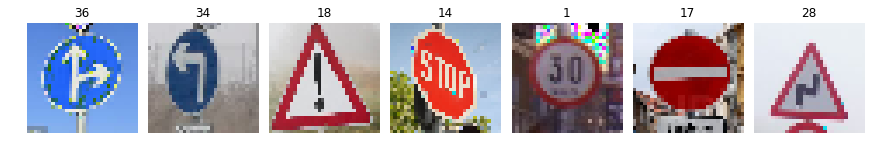

In [123]:
# Evaluate the Gray VGG model over the web images

with tf.Session() as sess:
#     saver = tf.train.import_meta_graph('lenet1_model/lenet_balanced_best.meta')
    saver = tf.train.import_meta_graph('vgg_model1/vgg_balanced_best.meta')
    sess.run(tf.global_variables_initializer())
#     saver.restore(sess,tf.train.latest_checkpoint('./lenet1_model/'))
    saver.restore(sess,tf.train.latest_checkpoint('./vgg_model1/'))
    
#     predict_web = sess.run(predict, feed_dict={x: gray_X_web if channels==1 else X_web})
    predict_web = sess.run(vgg_predict, feed_dict={vgg_x: gray_X_web if channels==1 else X_web})
    
    fig, axs = plt.subplots(1,len(predict_web), figsize=(15, 129))
    fig.subplots_adjust(hspace = .2, wspace=.1)
    axs = axs.ravel()
    for k in range(len(predict_web)):
        axs[k].axis('off')
        axs[k].imshow(rescaled_imgs[k])
        axs[k].set_title(predict_web[k])
    for k in range(len(predict_web)):
        print(predict_web[k], sign_dict[predict_web[k]])

### Analyze Performance

6 out of 6 are correct. It's 100% accurate on these new images.
The 7th image has a label that is not included in the training data

The model failed to predict `Right-of-way at the next intersection`

Accuracy over the test data is 92.0%

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [122]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('vgg_model1/vgg_balanced_best.meta')
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./vgg_model1/'))
    top_5 = tf.nn.top_k(tf.nn.softmax(vgg_logits_pred), k=5)

    prob, ind = sess.run(top_5, feed_dict={vgg_x: gray_X_web if channels==1 else X_web})

    for k in range(len(gray_X_web)):
        print('Image', k)
        for i in range(len(ind[k])):
            print(ind[k][i],sign_dict[ind[k][i]],':',prob[k][i])

INFO:tensorflow:Restoring parameters from ./vgg_model1/vgg_balanced_94.2857142398
Image 0
36 Go straight or right : 0.809361
33 Turn right ahead : 0.190637
35 Ahead only : 1.70663e-06
38 Keep right : 2.45226e-07
42 End of no passing by vehicles over 3.5 metric tons : 1.27938e-08
Image 1
34 Turn left ahead : 0.998798
38 Keep right : 0.000646399
35 Ahead only : 0.000517454
36 Go straight or right : 1.95769e-05
37 Go straight or left : 1.75404e-05
Image 2
18 General caution : 0.996853
24 Road narrows on the right : 0.00138585
27 Pedestrians : 0.00111512
26 Traffic signals : 0.00057348
11 Right-of-way at the next intersection : 7.23495e-05
Image 3
14 Stop : 1.0
1 Speed limit (30km/h) : 1.24687e-15
25 Road work : 4.76721e-18
24 Road narrows on the right : 4.07421e-19
0 Speed limit (20km/h) : 2.47972e-20
Image 4
1 Speed limit (30km/h) : 0.925796
2 Speed limit (50km/h) : 0.0731715
4 Speed limit (70km/h) : 0.000847794
7 Speed limit (100km/h) : 9.14498e-05
0 Speed limit (20km/h) : 5.41302e-05
I

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [65]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, place_holder=x, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={place_holder : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

#### Visualizing VGG

INFO:tensorflow:Restoring parameters from ./vgg_model1/vgg_balanced_94.2857142398


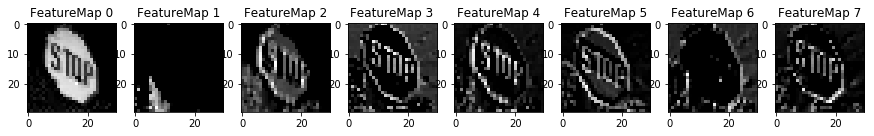

In [134]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('vgg_model1/vgg_balanced_best.meta')
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./vgg_model1/'))
    outputFeatureMap(gray_X_web[3:4] if channels==1 else X_web[3:4], 
                     net_cfg.net['VGG']['conv1'], place_holder = vgg_x)    


INFO:tensorflow:Restoring parameters from ./vgg_model/vgg_balanced_best


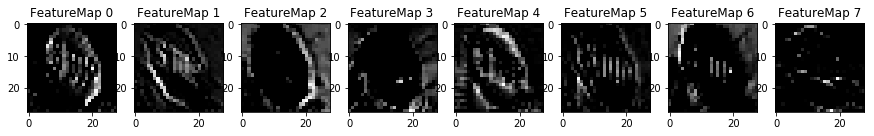

In [135]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('vgg_model1/vgg_balanced_best.meta')
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./vgg_model/'))
    outputFeatureMap(gray_X_web[3:4] if channels==1 else X_web[3:4], 
                     net_cfg.net['VGG']['conv2'], place_holder = vgg_x)    


INFO:tensorflow:Restoring parameters from ./vgg_model/vgg_balanced_best


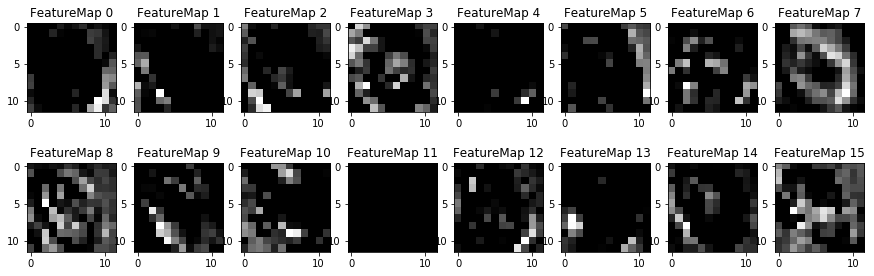

In [136]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('vgg_model1/vgg_balanced_best.meta')
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./vgg_model/'))
    outputFeatureMap(gray_X_web[3:4] if channels==1 else X_web[3:4], 
                     net_cfg.net['VGG']['conv3'], place_holder = vgg_x)    


INFO:tensorflow:Restoring parameters from ./vgg_model/vgg_balanced_best


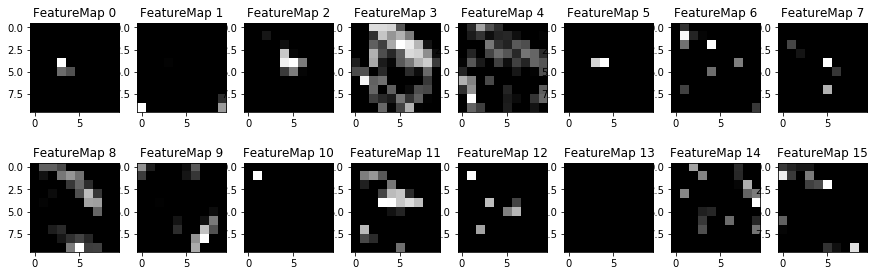

In [137]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('vgg_model1/vgg_balanced_best.meta')
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./vgg_model/'))
    outputFeatureMap(gray_X_web[3:4] if channels==1 else X_web[3:4], 
                     net_cfg.net['VGG']['conv4'], place_holder = vgg_x)    


#### Visualizing LeNet2

INFO:tensorflow:Restoring parameters from ./lenet2_model/lenet_balanced_92.3129250673


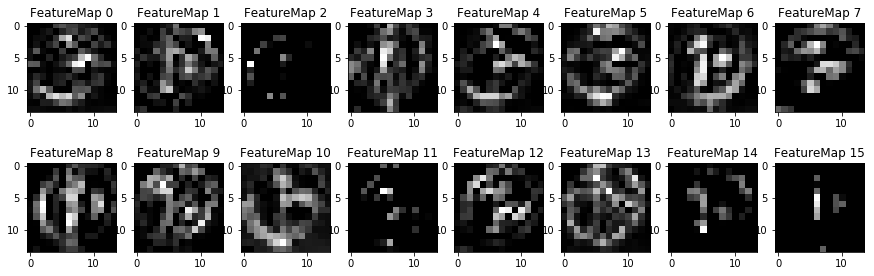

In [92]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet2_model/lenet_more_filter_best.meta')
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./lenet2_model/'))
    outputFeatureMap(gray_X_web[0:1], net_cfg.net['LeNet2']['conv1'], place_holder = x)    


INFO:tensorflow:Restoring parameters from ./lenet2_model/lenet_balanced_92.3129250673


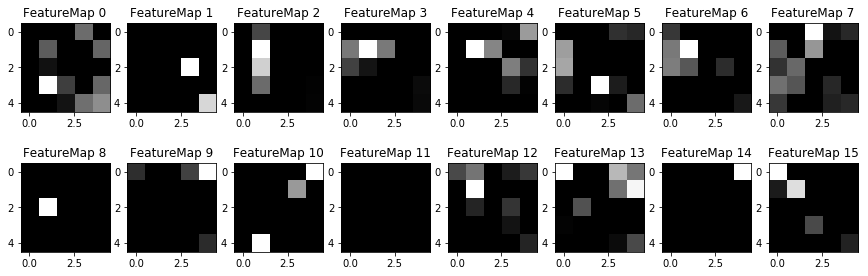

In [93]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet2_model/lenet_more_filter_best.meta')
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./lenet2_model/'))
    outputFeatureMap(gray_X_web[0:1], net_cfg.net['LeNet2']['conv2'], place_holder = x)    


#### Visualizing LeNet1

INFO:tensorflow:Restoring parameters from ./lenet1_model/lenet_balanced_best


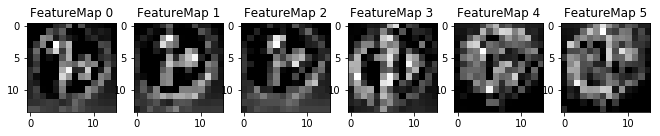

In [116]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet1_model/lenet_balanced_best.meta')
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./lenet1_model/'))
    outputFeatureMap(gray_X_web[0:1], net_cfg.net['LeNet1']['conv1'], place_holder = x)    


INFO:tensorflow:Restoring parameters from ./lenet1_model/lenet_balanced_best


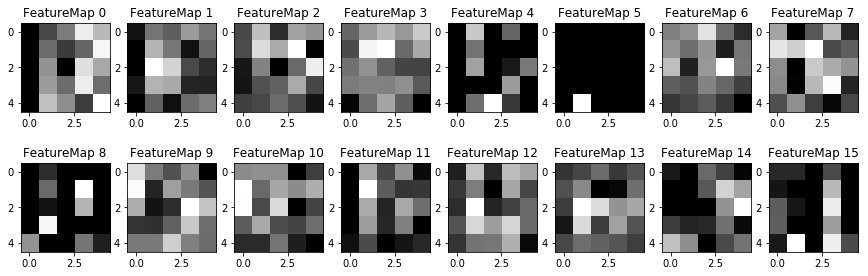

In [97]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('lenet1_model/lenet_balanced_best.meta')
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('./lenet1_model/'))
    outputFeatureMap(gray_X_web[0:1], net_cfg.net['LeNet1']['conv2'], place_holder = x)  